In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
#These will help you to see all records as well as columns in the data set
pd.set_option('display.max_columns', 500)

## Importing Data

In [3]:
#  Customers information
Customers = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/CUSTOMERS.csv')

# Sellers information
Sellers = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/SELLERS.csv')

# Product information
Products = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/PRODUCTS.csv')

# Orders info like ordered, product id, status, order dates etc..
Orders = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDERS.csv')

# Order level information
Order_Items = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_ITEMS.csv')

# Order payment information
Order_Payments = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_PAYMENTS.csv')

# Customer ratings at order level
Order_Review_Ratings = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/ORDER_REVIEW_RATINGS.csv')

# Location details
Geo_Location = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/5. Python Foundation End to End Case Study_E-Commerce Analytics Project/GEO_LOCATION.csv')

##### Customers data

In [4]:
Customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [5]:
Customers.duplicated().sum()

0

In [6]:
Customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [7]:
Customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

###### Sellers data

In [8]:
Sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [9]:
Sellers.duplicated().sum()

0

In [10]:
Sellers.isna().sum()

seller_id                  0
seller_zip_code_prefix     0
seller_city               57
seller_state              57
dtype: int64

In [11]:
Sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

###### products data

In [12]:
Products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
Products.duplicated().sum()

0

In [14]:
Products.isna().sum()

product_id                      0
product_category_name         623
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [15]:
Products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

##### Orders data

In [16]:
Orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [17]:
Orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [18]:
Orders.order_purchase_timestamp = pd.to_datetime(Orders.order_purchase_timestamp)

In [19]:
Orders.order_approved_at = pd.to_datetime(Orders.order_approved_at)

In [20]:
Orders.order_delivered_carrier_date = pd.to_datetime(Orders.order_delivered_carrier_date)

In [21]:
Orders.order_delivered_customer_date = pd.to_datetime(Orders.order_delivered_customer_date)

In [22]:
Orders.order_estimated_delivery_date = pd.to_datetime(Orders.order_estimated_delivery_date)

In [23]:
Orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [24]:
Orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

##### Order_Items data

In [25]:
Order_Items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [26]:
Order_Items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [27]:
Order_Items.shipping_limit_date = pd.to_datetime(Order_Items.shipping_limit_date)

In [28]:
Order_Items.duplicated().sum()

0

In [29]:
Order_Items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

##### Order_Payments data

In [30]:
Order_Payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [31]:
Order_Payments.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

In [32]:
Order_Payments.duplicated().sum()

0

In [33]:
Order_Payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

##### Order_Review_Ratings data

In [34]:
Order_Review_Ratings.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26


In [35]:
Order_Review_Ratings.dtypes

review_id                  object
order_id                   object
review_score                int64
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [36]:
Order_Review_Ratings.review_creation_date = pd.to_datetime(Order_Review_Ratings.review_creation_date)

In [37]:
Order_Review_Ratings.review_answer_timestamp = pd.to_datetime(Order_Review_Ratings.review_answer_timestamp)

In [38]:
Order_Review_Ratings.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

In [39]:
Order_Review_Ratings.duplicated().sum()

0

In [40]:
Order_Review_Ratings.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Geo_Location data

In [41]:
Geo_Location.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh


In [42]:
Geo_Location.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [43]:
Geo_Location.duplicated().sum()

0

In [44]:
Geo_Location.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

### Merging Data

In [45]:
# Customer + Geo location
Customers_Geo = pd.merge(left=Customers, right=Geo_Location, how='inner', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

In [46]:
del Customers_Geo['geolocation_zip_code_prefix']

In [47]:
Customers_Geo.rename(columns={'geolocation_lat':'cust_geolocation_lat',
                           'geolocation_lng':'cust_geolocation_lng',
                             'geolocation_city':'cust_geolocation_city',
                             'geolocation_state':'cust_geolocation_state'}, inplace=True)

In [48]:
Customers_Geo.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,cust_geolocation_lat,cust_geolocation_lng,cust_geolocation_city,cust_geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh


In [49]:
# Seller + Geo location
Sellers_Geo = pd.merge(left=Sellers, right=Geo_Location, how='inner',left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')

In [50]:
del Sellers_Geo['geolocation_zip_code_prefix']

In [51]:
Sellers_Geo.rename(columns={'geolocation_lat':'seller_geolocation_lat',
                           'geolocation_lng':'seller_geolocation_lng',
                             'geolocation_city':'seller_geolocation_city',
                             'geolocation_state':'seller_geolocation_state'}, inplace=True)

In [52]:
Sellers_Geo.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,seller_geolocation_city,seller_geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh,-22.898536,-47.063125,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh,-22.898536,-47.063125,Alwal,Andhra Pradesh
2,e0eabded302882513ced4ea3eb0c7059,13023,Alwal,Andhra Pradesh,-22.898536,-47.063125,Alwal,Andhra Pradesh
3,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh,-22.910641,-43.176510,Badepalle,Andhra Pradesh
4,1d2732ef8321502ee8488e8bed1ab8cd,20031,Badepalle,Andhra Pradesh,-22.910641,-43.176510,Badepalle,Andhra Pradesh


In [53]:
# Customer + Geo location + Orders
Cust_Ord = pd.merge(left=Customers_Geo, right=Orders, how='inner', left_on='customer_id', right_on='customer_id')

In [54]:
# Customer + Geo location + Orders + Order Payment
Cust_Ord_Pay = pd.merge(left=Cust_Ord, right=Order_Payments, how='inner',left_on='order_id',right_on='order_id')

In [55]:
# Customer + Geo location + Orders + Order Payment + Order Review Ratings
Cust_Ord_Pay_Review = pd.merge(left=Cust_Ord_Pay, right=Order_Review_Ratings, how='inner',left_on='order_id',right_on='order_id')

In [56]:
# Order item + Seller + Geo location
Order_Items_Sell = pd.merge(left=Order_Items, right=Sellers_Geo, how='inner',left_on='seller_id',right_on='seller_id')

In [57]:
# Order item + Seller + Geo location + Products
Order_Items_Sell_Prod = pd.merge(left=Order_Items_Sell, right=Products, how='inner',left_on='product_id',right_on='product_id')

In [58]:
# Customer + Geo location + Orders + Order Payment + Order Review Ratings + Order item + Seller + Geo location + Products
final_data = pd.merge(left=Cust_Ord_Pay_Review, right=Order_Items_Sell_Prod, how='inner',left_on='order_id',right_on='order_id')

In [59]:
final_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,cust_geolocation_lat,cust_geolocation_lng,cust_geolocation_city,cust_geolocation_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,seller_geolocation_city,seller_geolocation_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,2017-05-26,2017-05-30 22:34:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:00,124.99,21.88,8577,Vijayawada,Andhra Pradesh,-23.482623,-46.374490,Vijayawada,Andhra Pradesh,Office_Furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:00,2018-06-15 20:41:00,2018-06-18 15:52:00,2018-06-21 12:18:00,2018-07-05,1,credit_card,8,94.77,16a27e5ffd29a7cdf0e4984b0cab46b7,5,2018-06-22,2018-06-26 19:17:00,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-06-19 20:30:00,79.90,14.87,14940,Tarsali,Gujarat,-21.766477,-48.831547,Tarsali,Gujarat,Bed_Bath_Table,54.0,245.0,1.0,1383.0,50.0,10.0,40.0
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:00,2017-09-11 13:43:00,2017-09-18 20:21:00,2017-10-02,1,credit_card,1,62.50,23be511c12a57fe4052555f9c8905d8b,5,2017-09-19,2017-09-20 03:47:00,1,83fe1ea6fd12c51fcd341a9968e65cc3,a3a38f4affed601eb87a97788c949667,2017-09-14 15:50:00,44.90,17.60,89204,Pithora,Chhattisgarh,-26.283149,-48.851285,Pithora,Chhattisgarh,Toys,40.0,403.0,1.0,1200.0,47.0,7.0,26.0
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:00,2018-03-26 12:15:00,2018-03-27 00:54:00,2018-03-28 19:27:00,2018-04-12,1,credit_card,3,32.69,e0fd752f37c8c6866ceb53b79b0715f6,5,2018-03-29,2018-04-11 20:07:00,1,ccb3df28522945422e24b108603a1d04,39d54ff918774174706fb065d7f9dc07,2018-03-30 12:15:00,19.90,12.79,4243,Akkarampalle,Andhra Pradesh,-23.626269,-46.586534,Akkarampalle,Andhra Pradesh,Auto,46.0,708.0,1.0,567.0,19.0,14.0,15.0
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866,Adilabad,Andhra Pradesh,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:00,2018-07-29 20:55:00,2018-07-31 12:39:00,2018-08-03 16:48:00,2018-08-09,1,credit_card,1,77.01,51fb9267e6687e5ab21e4539999188ed,5,2018-08-04,2018-08-04 23:20:00,1,cb7d42475660f66a519c76f55715cd32,bd0a1b0aadca9a83d9304f7e8ff5fbd5,2018-08-02 20:55:00,63.90,13.11,1212,Akkarampalle,Andhra Pradesh,-23.537511,-46.637057,Akkarampalle,Andhra Pradesh,Telephony,51.0,339.0,3.0,300.0,20.0,7.0,15.0


In [60]:
final_data.shape

(117734, 45)

In [61]:
final_data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'cust_geolocation_lat',
       'cust_geolocation_lng', 'cust_geolocation_city',
       'cust_geolocation_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'seller_geolocation_lat', 'seller_geolocation_lng',
       'seller_geolocation_city', 'seller_geolocation_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'prod

In [62]:
final_data.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
cust_geolocation_lat                0
cust_geolocation_lng                0
cust_geolocation_city               0
cust_geolocation_state              0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1243
order_delivered_customer_date    2570
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
order_item_id                       0
product_id                          0
seller_id   

In [63]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117734 entries, 0 to 117733
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117734 non-null  object        
 1   customer_unique_id             117734 non-null  object        
 2   customer_zip_code_prefix       117734 non-null  int64         
 3   customer_city                  117734 non-null  object        
 4   customer_state                 117734 non-null  object        
 5   cust_geolocation_lat           117734 non-null  float64       
 6   cust_geolocation_lng           117734 non-null  float64       
 7   cust_geolocation_city          117734 non-null  object        
 8   cust_geolocation_state         117734 non-null  object        
 9   order_id                       117734 non-null  object        
 10  order_status                   117734 non-null  object        
 11  

## 1. Perform Detailed exploratory analysis

### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

- **Basis of OrderPeriod**

In [64]:
final_data['OrderPeriod'] = final_data.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m'))

In [65]:
final_data.groupby(['OrderPeriod']).agg({'payment_value':'sum','product_id':'count','product_category_name':'nunique','customer_id':'nunique','seller_id':'nunique','customer_city':'nunique','seller_city':'nunique','payment_type':'nunique'})

,payment_value,product_id,product_category_name,customer_id,seller_id,customer_city,seller_city,payment_type
OrderPeriod,,,,,,,,
2016-09,347.52,3,2,2,2,2,2,1
2016-10,74773.54,386,31,308,143,171,80,4
2016-12,19.62,1,1,1,1,1,1,1
2017-01,189570.02,1023,43,789,227,369,108,4
2017-02,346214.31,2072,51,1732,427,625,163,4
2017-03,528521.51,3188,53,2630,498,789,188,4
2017-04,505535.98,2849,57,2377,504,777,194,4
2017-05,727347.82,4423,58,3642,579,974,212,4
2017-06,599204.80,3794,59,3195,537,887,206,4


- **Basis of customer_state**

In [66]:
final_data.groupby(['customer_state']).agg({'payment_value':'sum','product_id':'count','product_category_name':'nunique','customer_id':'nunique','seller_id':'nunique','customer_city':'nunique','seller_city':'nunique','payment_type':'nunique'})

,payment_value,product_id,product_category_name,customer_id,seller_id,customer_city,seller_city,payment_type
customer_state,,,,,,,,
Andhra Pradesh,1.211281e+07,72425,71,59907,2780,206,507,4
Arunachal Pradesh,2.303439e+05,1315,54,1107,544,17,184,4
Chhattisgarh,1.312578e+06,7403,67,6285,1311,93,337,4
Delhi,7.314600e+05,3916,63,3297,975,60,278,4
Goa,9.128000e+02,9,9,9,9,9,9,2
Gujarat,1.604256e+06,8837,68,7372,1421,231,357,4
Haryana,4.562923e+05,2619,58,2158,782,101,231,4
Himachal Pradesh,1.563425e+05,860,51,733,409,50,159,4
Jammu & Kashmir,3.365408e+05,1827,57,1525,660,71,220,4


- **Basis of seller_state**

In [67]:
final_data.groupby(['seller_state']).agg({'payment_value':'sum','product_id':'count','product_category_name':'nunique','customer_id':'nunique','seller_id':'nunique','customer_city':'nunique','seller_city':'nunique','payment_type':'nunique'})

,payment_value,product_id,product_category_name,customer_id,seller_id,customer_city,seller_city,payment_type
seller_state,,,,,,,,
Andhra Pradesh,1.352655e+07,79469,69,66650,2054,3564,126,4
Arunachal Pradesh,1.350301e+05,789,22,693,21,309,7,4
Chhattisgarh,1.039605e+06,5685,57,4708,205,1001,50,4
Delhi,4.168213e+05,2418,48,2149,89,693,23,4
Gujarat,2.503298e+06,15177,57,12523,220,1883,75,4
Haryana,6.053714e+05,3427,45,2948,65,792,27,4
Himachal Pradesh,1.062649e+05,462,16,369,16,200,7,4
Jammu & Kashmir,1.795983e+05,1258,39,1110,50,429,19,4
Karnataka,4.166304e+05,2602,45,2140,106,641,48,4


- **Basis of order_status**

In [68]:
final_data.groupby(['order_status']).agg({'payment_value':'sum','product_id':'count','product_category_name':'nunique','customer_id':'nunique','seller_id':'nunique','customer_city':'nunique','seller_city':'nunique','payment_type':'nunique'})

,payment_value,product_id,product_category_name,customer_id,seller_id,customer_city,seller_city,payment_type
order_status,,,,,,,,
approved,302.70,3,2,2,2,2,2,1
canceled,145594.72,564,46,459,327,197,117,4
delivered,19792963.06,115165,71,96001,2963,4037,522,4
invoiced,82644.75,372,45,309,172,164,81,4
processing,100210.39,375,44,300,203,173,90,4
shipped,197265.39,1248,57,1099,497,339,181,4
unavailable,2332.68,7,5,6,6,6,6,1


- **Basis of product_category_name**

In [69]:
final_data.groupby(['product_category_name']).agg({'payment_value':'sum','product_id':'count','customer_id':'nunique','seller_id':'nunique','customer_city':'nunique','seller_city':'nunique','payment_type':'nunique'})

,payment_value,product_id,customer_id,seller_id,customer_city,seller_city,payment_type
product_category_name,,,,,,,
Agro_Industry_And_Commerce,118730.61,252,182,34,106,23,4
Air_Conditioning,91170.66,302,253,52,125,36,4
Art,30992.93,219,202,36,110,25,4
Arts_And_Craftmanship,2326.17,24,23,13,19,11,3
Audio,60358.49,380,349,36,162,23,4
...,...,...,...,...,...,...,...
Stationery,315837.63,2607,2295,171,695,81,4
Tablets_Printing_Image,10042.93,87,79,6,56,3,3
Telephony,481634.46,4695,4174,148,1205,61,4


### b. Understanding how many new customers acquired every month

In [70]:
first_tran_date = final_data.groupby(['customer_id'])[['order_purchase_timestamp']].min().reset_index()

In [71]:
first_tran_date.columns = ['customer_id','first_order_date']

In [72]:
final_data = pd.merge(left=final_data, right=first_tran_date, how='inner',left_on='customer_id', right_on='customer_id')

In [73]:
final_data['User_Type'] = np.where(final_data.order_purchase_timestamp > final_data.first_order_date,'Existing','New')

In [74]:
df_new = final_data[final_data['User_Type']=='New']

In [75]:
df_new = df_new.groupby(['OrderPeriod'])[['customer_id']].nunique()

In [76]:
df_new

,customer_id
OrderPeriod,
2016-09,2
2016-10,308
2016-12,1
2017-01,789
2017-02,1732
2017-03,2630
2017-04,2377
2017-05,3642
2017-06,3195


<AxesSubplot:xlabel='OrderPeriod'>

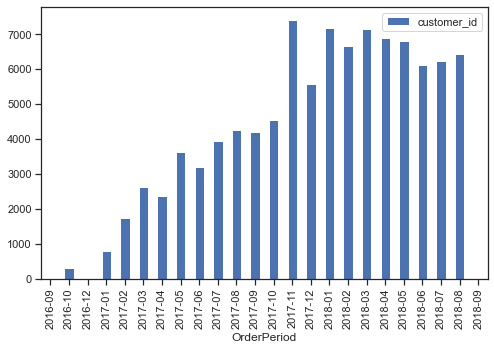

In [77]:
df_new.plot(kind='bar',figsize=(8,5))

### c. Understand the retention of customers on month on month basis

In [78]:
retention_data = final_data.groupby(['customer_id','OrderPeriod'])['payment_value'].sum().reset_index()
retention_data

,customer_id,OrderPeriod,payment_value
0,00012a2ce6f8dcda20d059ce98491703,2017-11,114.74
1,000161a058600d5901f007fab4c27140,2017-07,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04,107.01
...,...,...,...
98171,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03,91.91
98172,fffecc9f79fd8c764f843e9951b11341,2018-03,81.36
98173,fffeda5b6d849fbd39689bb92087f431,2018-05,63.13
98174,ffff42319e9b2d713724ae527742af25,2018-06,214.13


In [79]:
retention_data.OrderPeriod = retention_data.OrderPeriod.str.replace('-','')

In [80]:
#step 2: create a retention matrix with crosstab 
tx_retention = pd.crosstab(retention_data['customer_id'], retention_data['OrderPeriod']).reset_index()

In [81]:
tx_retention

OrderPeriod,customer_id,201609,201610,201612,201701,201702,201703,201704,201705,201706,201707,201708,201709,201710,201711,201712,201801,201802,201803,201804,201805,201806,201807,201808,201809
0,00012a2ce6f8dcda20d059ce98491703,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,000161a058600d5901f007fab4c27140,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0001fd6190edaaf884bcaf3d49edf079,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0002414f95344307404f0ace7a26f1d5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,000379cdec625522490c315e70c7a9fb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98171,fffcb937e9dd47a13f05ecb8290f4d3e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
98172,fffecc9f79fd8c764f843e9951b11341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
98173,fffeda5b6d849fbd39689bb92087f431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
98174,ffff42319e9b2d713724ae527742af25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [82]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = tx_retention.columns[1:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    
    #month year timestamp
    retention_data['OrderPeriod'] = int(selected_month)
    
    #total user count (since its crosstab)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    
    #sum where this month is greater than 0 and previous month is greater than 0 
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

In [83]:
retention_array

[{'OrderPeriod': 201610, 'TotalUserCount': 308, 'RetainedUserCount': 0},
 {'OrderPeriod': 201612, 'TotalUserCount': 1, 'RetainedUserCount': 0},
 {'OrderPeriod': 201701, 'TotalUserCount': 789, 'RetainedUserCount': 0},
 {'OrderPeriod': 201702, 'TotalUserCount': 1732, 'RetainedUserCount': 0},
 {'OrderPeriod': 201703, 'TotalUserCount': 2630, 'RetainedUserCount': 0},
 {'OrderPeriod': 201704, 'TotalUserCount': 2377, 'RetainedUserCount': 0},
 {'OrderPeriod': 201705, 'TotalUserCount': 3642, 'RetainedUserCount': 0},
 {'OrderPeriod': 201706, 'TotalUserCount': 3195, 'RetainedUserCount': 0},
 {'OrderPeriod': 201707, 'TotalUserCount': 3948, 'RetainedUserCount': 0},
 {'OrderPeriod': 201708, 'TotalUserCount': 4270, 'RetainedUserCount': 0},
 {'OrderPeriod': 201709, 'TotalUserCount': 4217, 'RetainedUserCount': 0},
 {'OrderPeriod': 201710, 'TotalUserCount': 4539, 'RetainedUserCount': 0},
 {'OrderPeriod': 201711, 'TotalUserCount': 7413, 'RetainedUserCount': 0},
 {'OrderPeriod': 201712, 'TotalUserCount': 

In [84]:
#turning retention array into pandas df
tx_retention = pd.DataFrame(retention_array).set_index('OrderPeriod')

In [85]:
tx_retention['RetentionRate'] = tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']

In [86]:
tx_retention.rename(index={201610:'2016-10', 201612:'2016-12', 201701:'2017-01', 201702:'2017-02', 201703:'2017-03', 201704:'2017-04',
                           201705:'2017-05', 201706:'2017-06', 201707:'2017-07', 201708:'2017-08', 201709:'2017-09', 201710:'2017-10',
                           201711:'2017-11', 201712:'2017-12', 201801:'2018-01', 201802:'2018-02', 201803:'2018-03', 201804:'2018-04',
                           201805:'2018-05', 201806:'2018-06', 201807:'2018-07', 201808:'2018-08', 201809:'2018-09'})

,TotalUserCount,RetainedUserCount,RetentionRate
OrderPeriod,,,
2016-10,308,0,0.0
2016-12,1,0,0.0
2017-01,789,0,0.0
2017-02,1732,0,0.0
2017-03,2630,0,0.0
2017-04,2377,0,0.0
2017-05,3642,0,0.0
2017-06,3195,0,0.0
2017-07,3948,0,0.0


**Since each customer id is unique for each month so, we can't find the customer retaintion for the given data**

### d. How the revenues from existing/new customers on month on month basis

In [87]:
Monthly_revenue = final_data.pivot_table(index='OrderPeriod', columns='User_Type',values='payment_value',aggfunc='sum')
Monthly_revenue

User_Type,New
OrderPeriod,
2016-09,347.52
2016-10,74773.54
2016-12,19.62
2017-01,189570.02
2017-02,346214.31
2017-03,528521.51
2017-04,505535.98
2017-05,727347.82
2017-06,599204.80


**The customer id is unique for each transaction for each month in the given data. So, the every customer is new and there is not any existing customer**

### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [88]:
final_data['Order_Month'] = final_data.order_purchase_timestamp.dt.month

In [89]:
final_data['Order_week'] = final_data.order_purchase_timestamp.dt.weekday

In [90]:
final_data['Order_Day'] = final_data.order_purchase_timestamp.dt.day

In [91]:
final_data['Order_Time'] = final_data.order_purchase_timestamp.dt.time.value_counts()

#### trends/seasonality of sales

- **By Category**

In [92]:
trend_by_category = final_data.pivot_table(index='Order_Month',columns='product_category_name',values='payment_value',aggfunc='sum')

In [93]:
trend_by_category

product_category_name,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,Books_General_Interest,Books_Imported,Books_Technical,Cds_Dvds_Musicals,Christmas_Supplies,Cine_Photo,Computers,Computers_Accessories,Consoles_Games,Construction_Tools_Construction,Construction_Tools_Lights,Construction_Tools_Safety,Cool_Stuff,Costruction_Tools_Garden,Costruction_Tools_Tools,Diapers_And_Hygiene,Drinks,Dvds_Blu_Ray,Electronics,Fashio_Female_Clothing,Fashion_Bags_Accessories,Fashion_Childrens_Clothes,Fashion_Male_Clothing,Fashion_Shoes,Fashion_Sport,Fashion_Underwear_Beach,Fixed_Telephony,Flowers,Food,Food_Drink,Furniture_Bedroom,Furniture_Decor,Furniture_Living_Room,Furniture_Mattress_And_Upholstery,Garden_Tools,Health_Beauty,Home_Appliances,Home_Appliances_2,Home_Comfort_2,Home_Confort,Home_Construction,Housewares,Industry_Commerce_And_Business,Kitchen_Dining_Laundry_Garden_Furniture,La_Cuisine,Luggage_Accessories,Market_Place,Music,Musical_Instruments,Office_Furniture,Party_Supplies,Perfumery,Pet_Shop,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
Order_Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6931.17,9230.57,2972.75,NaN,4440.13,58974.62,46522.08,145538.23,3655.56,648.67,1604.42,NaN,1325.30,223.78,10518.97,157445.30,15940.80,17201.47,3115.01,3547.15,61089.94,6180.20,695.13,942.25,4581.09,192.18,23184.91,299.29,13778.28,NaN,1092.26,1487.98,219.52,1048.17,3826.11,715.70,1362.03,582.46,1246.40,131906.70,5079.52,1270.40,61110.68,108193.26,2386.12,11543.15,95.57,3847.89,11516.23,66439.00,5187.57,6462.84,130.03,23771.86,4234.17,77.31,17539.56,46548.88,170.26,32867.15,16923.97,209.06,1791.09,20240.82,385.13,144419.16,57464.96,248.68,26920.65,32081.35,111606.82
2,11195.00,6958.66,1869.19,NaN,3286.43,72359.99,35733.27,122067.15,3470.13,466.44,2547.80,NaN,7991.97,367.36,3602.47,227514.44,17842.39,16686.64,4714.62,6778.05,51963.66,4605.02,1633.20,603.04,3111.45,79.47,27110.46,564.86,17533.56,NaN,1209.88,1608.29,NaN,1267.50,12207.05,187.70,4667.35,1576.50,2000.74,102326.83,25422.64,691.48,67276.08,144609.82,7494.19,10016.85,140.00,4323.63,9429.41,75276.63,7345.84,7566.21,NaN,10552.76,6983.72,277.24,15309.53,81041.13,NaN,37065.26,20611.36,NaN,1449.49,15261.33,3213.64,126468.73,19128.24,1948.45,38748.57,29845.51,86687.36
3,7875.04,8259.53,940.21,NaN,13284.28,78994.53,54073.69,164189.15,8335.06,455.29,1457.63,NaN,1194.29,1187.37,NaN,183524.84,25284.73,19762.97,3254.41,15578.84,70039.50,3622.29,1248.97,1022.81,2097.95,2118.50,24243.49,648.94,20740.08,216.87,942.28,3400.59,151.40,829.03,7385.55,136.41,5802.59,3002.46,1265.69,168433.64,12568.27,584.93,90577.51,147414.86,12211.70,6654.42,435.22,6516.52,10081.54,102804.99,4803.88,3771.07,426.70,16680.81,4218.76,440.19,16008.89,95525.24,1138.79,49464.04,29992.93,NaN,1445.95,27855.54,8220.48,160317.89,25657.96,1100.28,46068.69,44608.37,139740.92
4,4783.66,7657.55,2770.21,34.22,10616.44,90228.17,79003.41,162825.61,9386.39,417.51,1663.38,117.58,843.77,787.44,17241.49,117646.11,13911.97,22078.19,9829.22,3522.43,67345.41,5102.71,2507.41,200.57,40800.24,1970.06,23042.64,1262.44,18997.63,NaN,806.29,4126.76,437.62,599.85,16132.55,353.94,3367.48,1251.95,3614.50,145512.64,11456.38,130.80,89714.53,148478.44,19527.24,22906.01,101.92,6120.39,16026.10,96067.90,8680.86,6261.68,731.49,20828.52,5382.86,1930.90,25810.05,80879.18,160.52,45694.76,34972.70,NaN,4746.39,38230.78,14769.18,133473.64,22854.33,1840.97,41195.41,46552.07,137856.90
5,5196.96,4331.18,10759.47,174.12,5560.87,81056.09,58768.93,167175.78,9578.60,777.14,4378.65,NaN,672.74,2776.97,24115.05,181425.78,15812.39,40186.60,10087.81,11351.17,79597.39,3881.57,1340.56,159.65,7035.37,821.20,32213.02,485.63,28052.79,124.52,1247.41,3803.46,140.39,741.34,5982.28,35.72,3776.50,5141.67,8131.80,143081.69,13760.71,731.88,86787.29,198078.28,10068.44,18887.84,NaN,

<AxesSubplot:xlabel='Order_Month'>

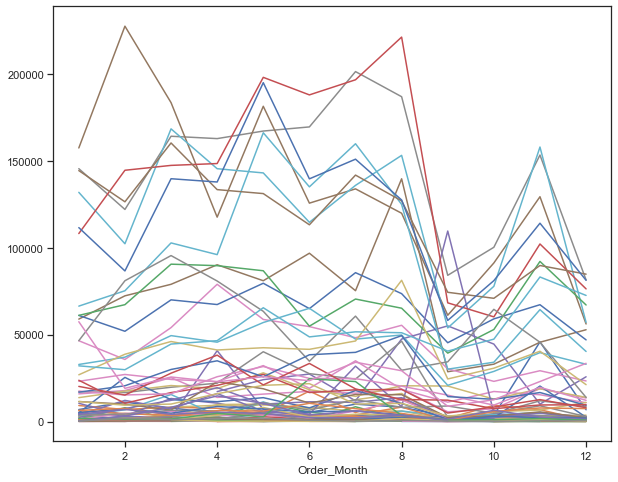

In [94]:
trend_by_category.plot(legend=False,figsize=(10,8))

In [95]:
seasonality_by_category = final_data.pivot_table(index='product_category_name',columns='Order_Month',values='payment_value',aggfunc='sum')

<AxesSubplot:xlabel='product_category_name'>

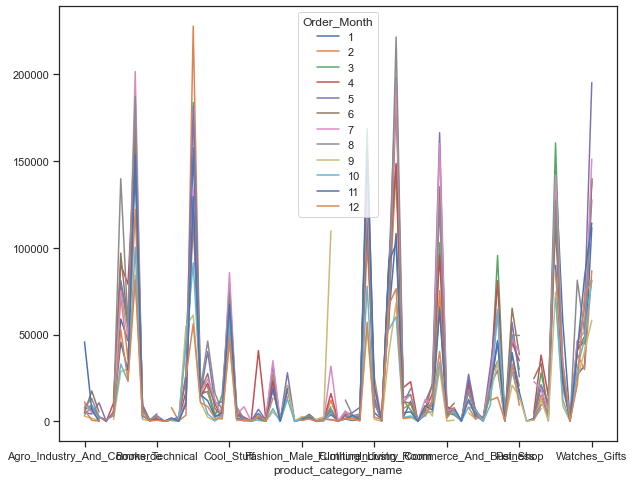

In [96]:
seasonality_by_category.plot(figsize=(10,8))

- **By Location**

In [97]:
trnd_by_location = final_data.pivot_table(index='Order_Month',columns='customer_state',values='payment_value',aggfunc='sum')

<AxesSubplot:xlabel='Order_Month'>

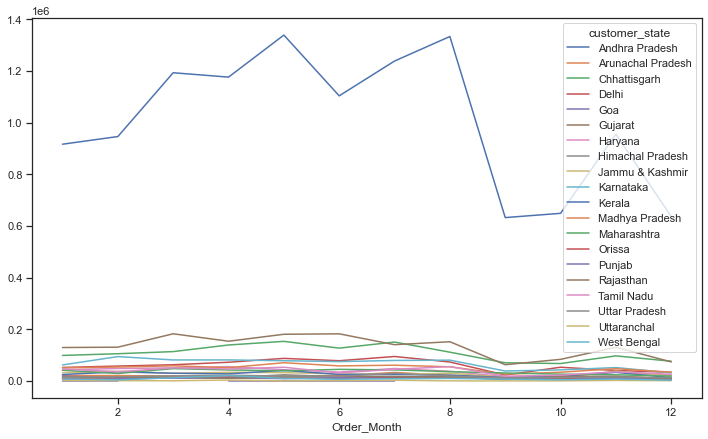

In [98]:
trnd_by_location.plot(legend=True,figsize=(12,7))

In [99]:
Seasonal_by_location = final_data.pivot_table(index='customer_state',columns='Order_Month',values='payment_value',aggfunc='sum')

<AxesSubplot:xlabel='customer_state'>

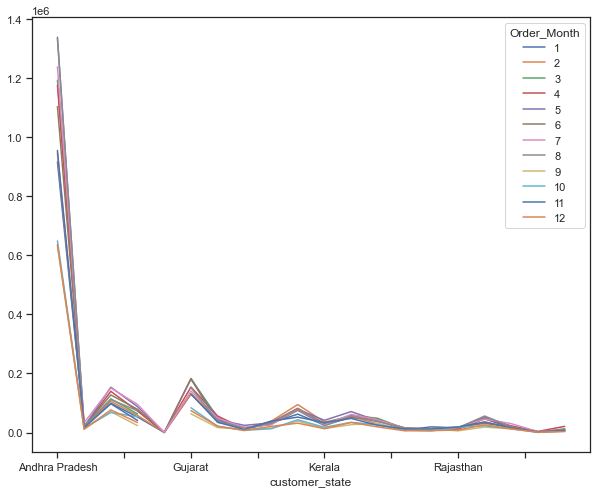

In [100]:
Seasonal_by_location.plot(figsize=(10,8))

- **By Week**

In [101]:
trnd_by_week = final_data.pivot_table(index='Order_Month',columns='Order_week',values='payment_value',aggfunc='sum')

<AxesSubplot:xlabel='Order_Month'>

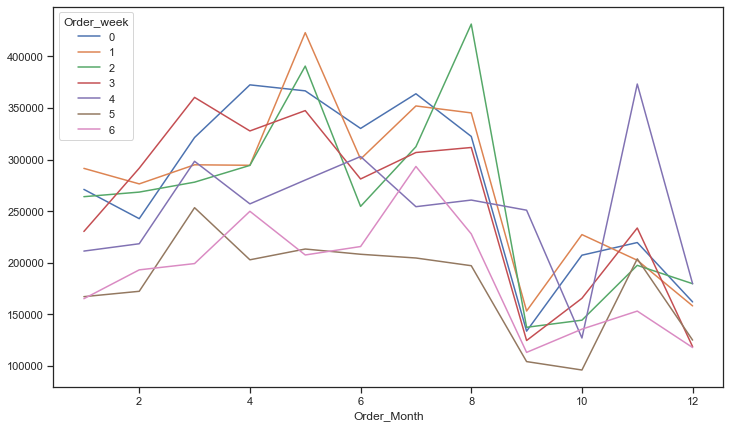

In [102]:
trnd_by_week.plot(legend=True,figsize=(12,7))

In [103]:
Seasonal_by_week = final_data.pivot_table(index='Order_week',columns='Order_Month',values='payment_value',aggfunc='sum')

<AxesSubplot:xlabel='Order_week'>

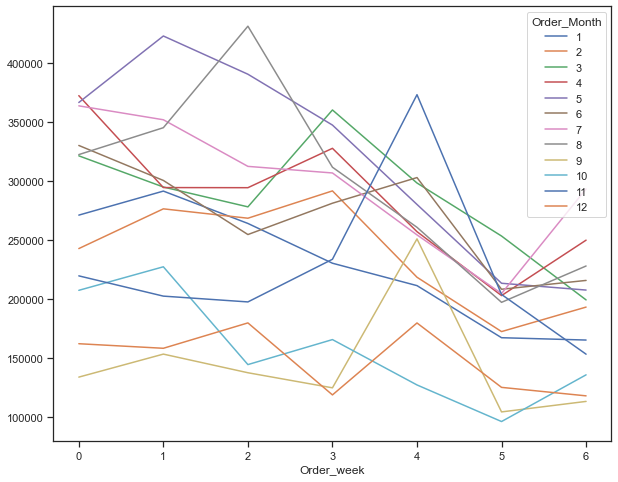

In [104]:
Seasonal_by_week.plot(figsize=(10,8))

- **By Days**

In [105]:
trnd_by_day = final_data.pivot_table(index='Order_Month',columns='Order_Day',values='payment_value',aggfunc='sum')

<AxesSubplot:xlabel='Order_Month'>

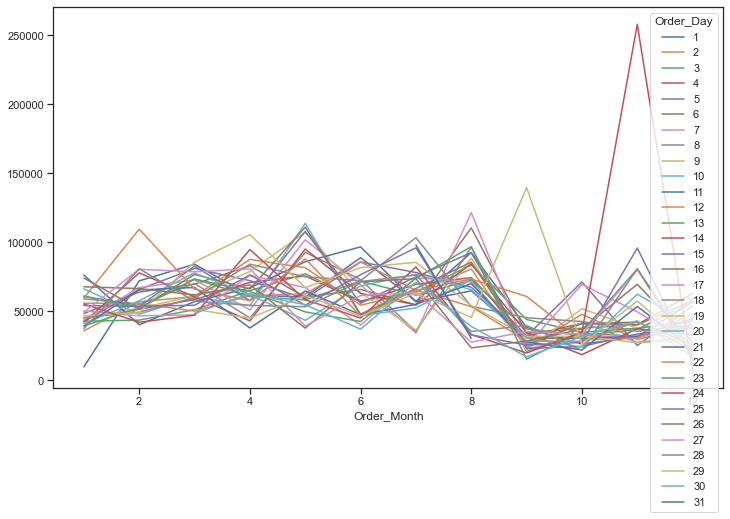

In [106]:
trnd_by_day.plot(legend=True,figsize=(12,7))

In [107]:
Seasonal_by_day = final_data.pivot_table(index='Order_Day',columns='Order_Month',values='payment_value',aggfunc='sum')

<AxesSubplot:xlabel='Order_Day'>

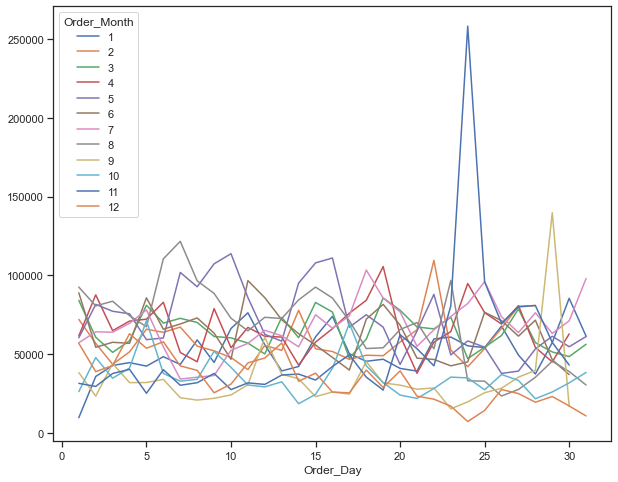

In [108]:
Seasonal_by_day.plot(figsize=(10,8))

- **By Payment method**

In [109]:
trnd_by_payment_type = final_data.pivot_table(index='Order_Month',columns='payment_type',values='payment_value',aggfunc='sum')

<AxesSubplot:xlabel='Order_Month'>

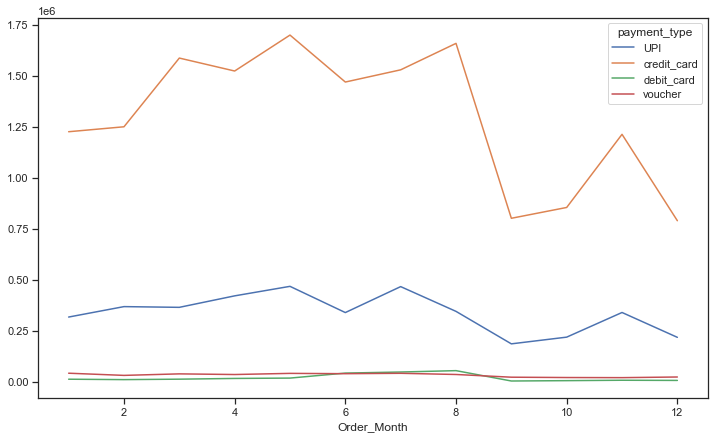

In [110]:
trnd_by_payment_type.plot(legend=True,figsize=(12,7))

In [111]:
Seasonal_by_payment_type = final_data.pivot_table(index='payment_type',columns='Order_Month',values='payment_value',aggfunc='sum')

<AxesSubplot:xlabel='payment_type'>

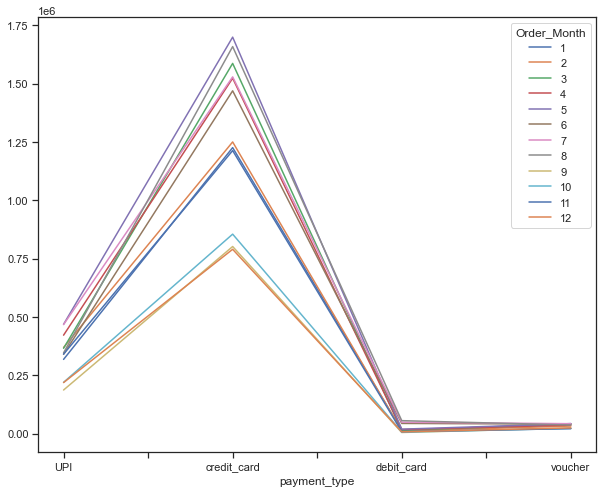

In [112]:
Seasonal_by_payment_type.plot(figsize=(10,8))

#### trends/seasonality of quantity

- **By Category**

In [113]:
trend_by_category = final_data.pivot_table(index='Order_Month',columns='product_category_name',values='order_item_id',aggfunc='sum')

<AxesSubplot:xlabel='Order_Month'>

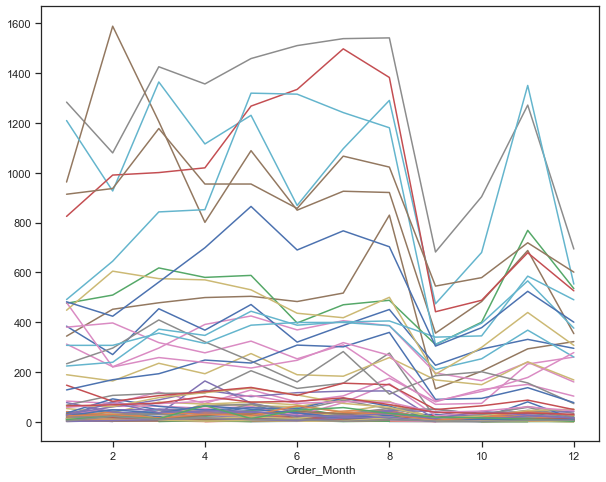

In [114]:
trend_by_category.plot(legend=False,figsize=(10,8))

In [115]:
seasonality_by_category = final_data.pivot_table(index='product_category_name',columns='Order_Month',values='order_item_id',aggfunc='sum')

<AxesSubplot:xlabel='product_category_name'>

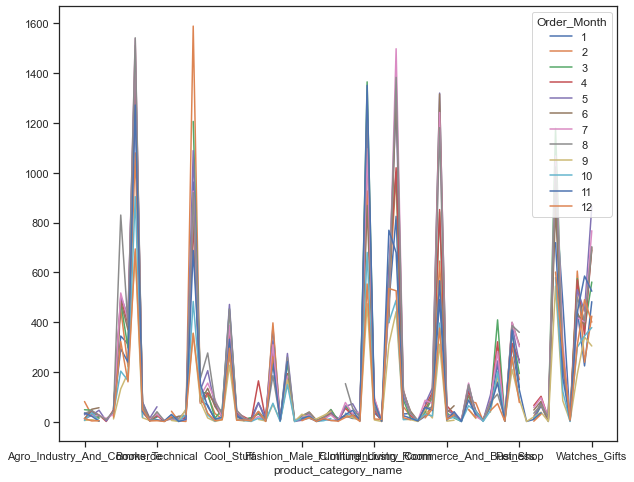

In [116]:
seasonality_by_category.plot(figsize=(10,8))

- **By Location**

In [117]:
trnd_by_location = final_data.pivot_table(index='Order_Month',columns='customer_state',values='order_item_id',aggfunc='sum')

<AxesSubplot:xlabel='Order_Month'>

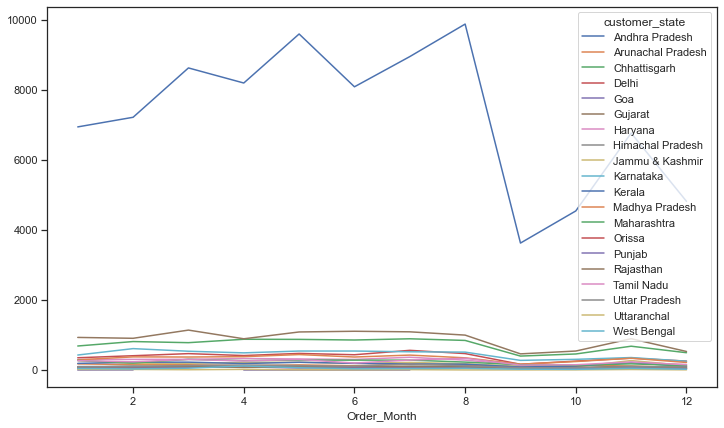

In [118]:
trnd_by_location.plot(legend=True,figsize=(12,7))

In [119]:
Seasonal_by_location = final_data.pivot_table(index='customer_state',columns='Order_Month',values='order_item_id',aggfunc='sum')

<AxesSubplot:xlabel='customer_state'>

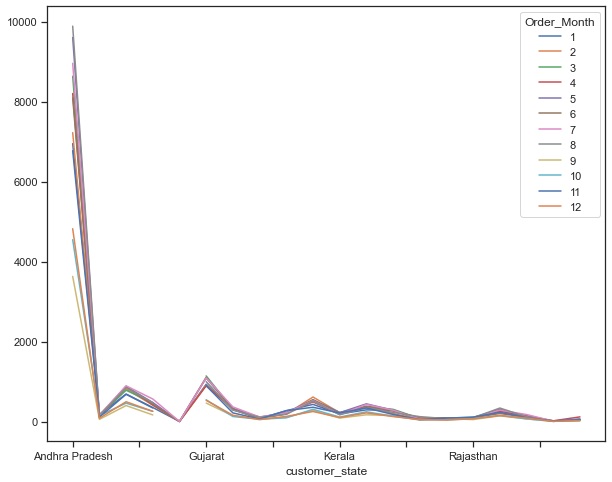

In [120]:
Seasonal_by_location.plot(figsize=(10,8))

- **By Week**

In [121]:
trnd_by_week = final_data.pivot_table(index='Order_Month',columns='Order_week',values='order_item_id',aggfunc='sum')

<AxesSubplot:xlabel='Order_Month'>

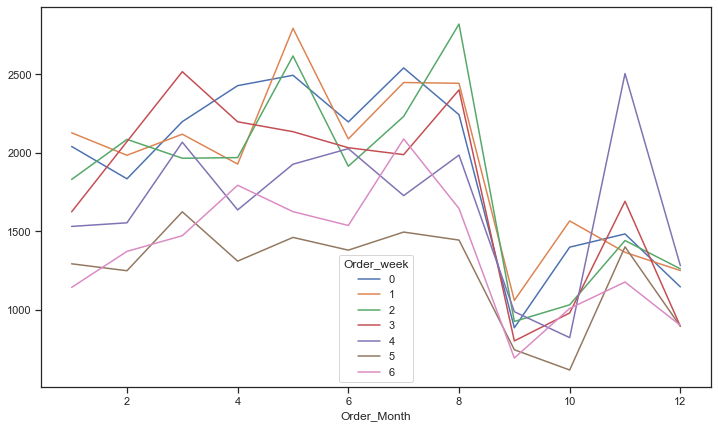

In [122]:
trnd_by_week.plot(legend=True,figsize=(12,7))

In [123]:
Seasonal_by_week = final_data.pivot_table(index='Order_week',columns='Order_Month',values='order_item_id',aggfunc='sum')

<AxesSubplot:xlabel='Order_week'>

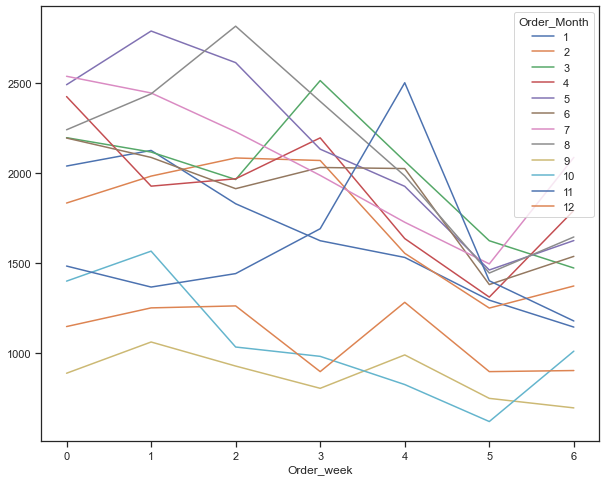

In [124]:
Seasonal_by_week.plot(figsize=(10,8))

- **By Days**

In [125]:
trnd_by_day = final_data.pivot_table(index='Order_Month',columns='Order_Day',values='order_item_id',aggfunc='sum')

<AxesSubplot:xlabel='Order_Month'>

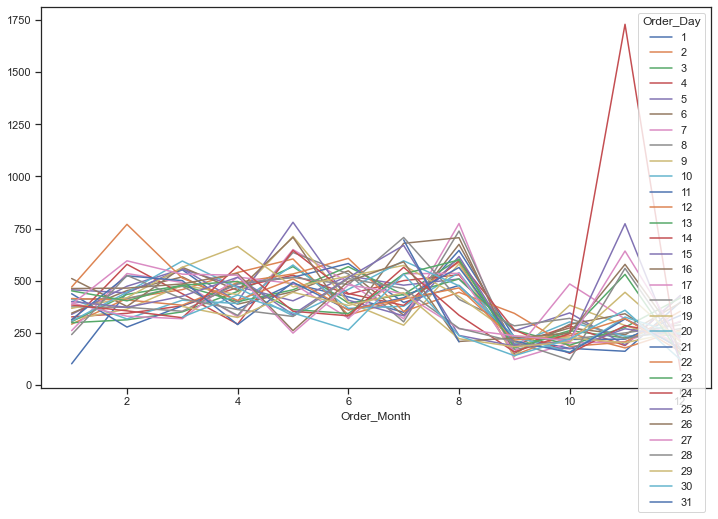

In [126]:
trnd_by_day.plot(legend=True,figsize=(12,7))

In [127]:
Seasonal_by_day = final_data.pivot_table(index='Order_Day',columns='Order_Month',values='order_item_id',aggfunc='sum')

<AxesSubplot:xlabel='Order_Day'>

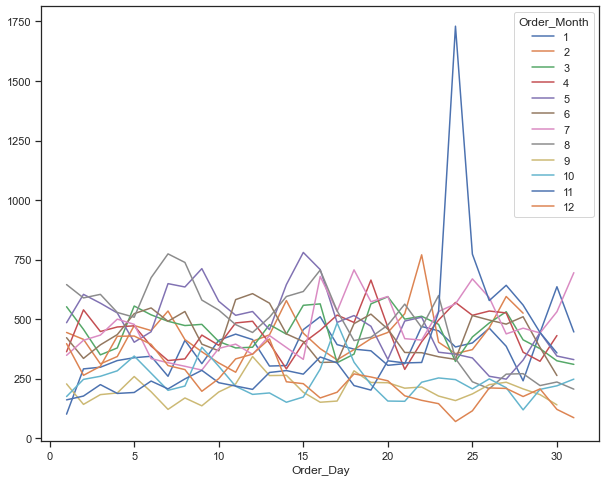

In [128]:
Seasonal_by_day.plot(figsize=(10,8))

- **By Payment method**

In [129]:
trnd_by_payment_type = final_data.pivot_table(index='Order_Month',columns='payment_type',values='order_item_id',aggfunc='sum')

<AxesSubplot:xlabel='Order_Month'>

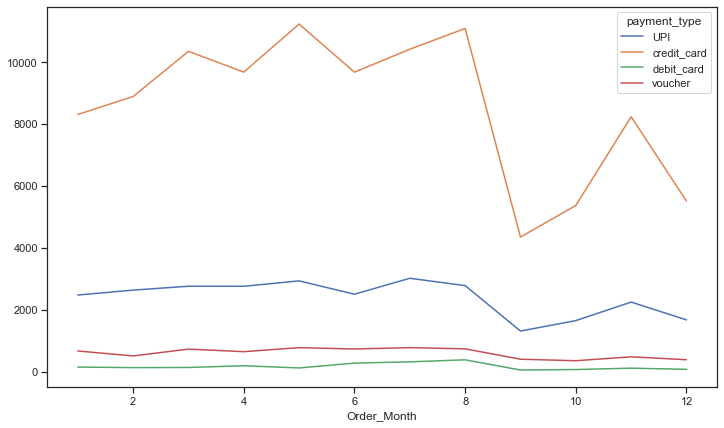

In [130]:
trnd_by_payment_type.plot(legend=True,figsize=(12,7))

In [131]:
Seasonal_by_payment_type = final_data.pivot_table(index='payment_type',columns='Order_Month',values='order_item_id',aggfunc='sum')

<AxesSubplot:xlabel='payment_type'>

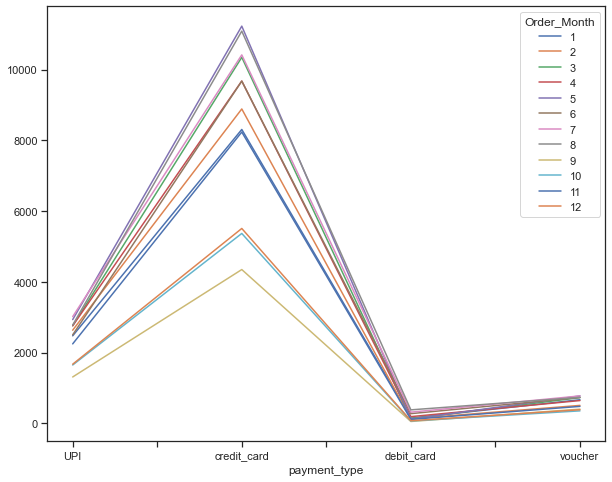

In [132]:
Seasonal_by_payment_type.plot(figsize=(10,8))

### f. Popular Products by month, seller, state, category.

#### By month

In [133]:
prod_per_mon = pd.crosstab(final_data['Order_Month'],final_data['product_id']).reset_index().rename_axis(None, axis=1).set_index('Order_Month')

In [134]:
prod_per_mon['Popular_product'] = prod_per_mon.idxmax(axis=1)

In [135]:
prod_per_mon.loc[:,['Popular_product']]

,Popular_product
Order_Month,
1,aca2eb7d00ea1a7b8ebd4e68314663af
2,3dd2a17168ec895c781a9191c1e95ad7
3,aca2eb7d00ea1a7b8ebd4e68314663af
4,aca2eb7d00ea1a7b8ebd4e68314663af
5,53b36df67ebb7c41585e8d54d6772e08
6,99a4788cb24856965c36a24e339b6058
7,99a4788cb24856965c36a24e339b6058
8,e7cc48a9daff5436f63d3aad9426f28b
9,0554911df28fda9fd668ce5ba5949695


####  By seller

In [136]:
prod_per_seller = pd.crosstab(final_data['product_category_name'],final_data['product_id']).reset_index().rename_axis(None, axis=1).set_index('product_category_name')

In [137]:
prod_per_seller['Popular_product'] = prod_per_seller.idxmax(axis=1)

In [138]:
prod_per_seller.loc[:,['Popular_product']]

,Popular_product
product_category_name,
Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed
Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb
Art,4fe644d766c7566dbc46fb851363cb3b
Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475
Audio,db5efde3ad0cc579b130d71c4b2db522
...,...
Stationery,fb55982be901439613a95940feefd9ee
Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4
Telephony,e7cc48a9daff5436f63d3aad9426f28b


####  By State

In [139]:
prod_per_state = pd.crosstab(final_data['customer_state'],final_data['product_id']).reset_index().rename_axis(None, axis=1).set_index('customer_state')

In [140]:
prod_per_state['Popular_product'] = prod_per_state.idxmax(axis=1)

In [141]:
prod_per_state.loc[:,['Popular_product']]

,Popular_product
customer_state,
Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af
Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff
Chhattisgarh,422879e10f46682990de24d770e7f83d
Delhi,53759a2ecddad2bb87a079a1f1519f73
Goa,2a5806f10d0f00e5ad032dd2e3c8806e
Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af
Haryana,35afc973633aaeb6b877ff57b2793310
Himachal Pradesh,422879e10f46682990de24d770e7f83d
Jammu & Kashmir,89b190a046022486c635022524a974a8


####  By Category

In [142]:
prod_per_category = pd.crosstab(final_data['product_category_name'],final_data['product_id']).reset_index().rename_axis(None, axis=1).set_index('product_category_name')

In [143]:
prod_per_category['Popular_product'] = prod_per_category.idxmax(axis=1)

In [144]:
prod_per_category.loc[:,['Popular_product']]

,Popular_product
product_category_name,
Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed
Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb
Art,4fe644d766c7566dbc46fb851363cb3b
Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475
Audio,db5efde3ad0cc579b130d71c4b2db522
...,...
Stationery,fb55982be901439613a95940feefd9ee
Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4
Telephony,e7cc48a9daff5436f63d3aad9426f28b


### g. Popular categories by state, month

####  By State

In [145]:
category_per_state = pd.crosstab(final_data['customer_state'],final_data['product_category_name']).reset_index().rename_axis(None, axis=1).set_index('customer_state')

In [146]:
category_per_state['Popular_Category'] = category_per_state.idxmax(axis=1)

In [147]:
category_per_state.loc[:,['Popular_Category']]

,Popular_Category
customer_state,
Andhra Pradesh,Bed_Bath_Table
Arunachal Pradesh,Bed_Bath_Table
Chhattisgarh,Bed_Bath_Table
Delhi,Health_Beauty
Goa,Auto
Gujarat,Bed_Bath_Table
Haryana,Bed_Bath_Table
Himachal Pradesh,Bed_Bath_Table
Jammu & Kashmir,Bed_Bath_Table


####  By Month

In [148]:
category_per_month = pd.crosstab(final_data['Order_Month'],final_data['product_category_name']).reset_index().rename_axis(None, axis=1).set_index('Order_Month')

In [149]:
category_per_month['Popular_Category'] = category_per_month.idxmax(axis=1)

In [150]:
category_per_month.loc[:,['Popular_Category']]

,Popular_Category
Order_Month,
1,Bed_Bath_Table
2,Computers_Accessories
3,Bed_Bath_Table
4,Bed_Bath_Table
5,Bed_Bath_Table
6,Bed_Bath_Table
7,Bed_Bath_Table
8,Bed_Bath_Table
9,Bed_Bath_Table


### h. List top 10 most expensive products sorted by price

In [151]:
top_10_prod = final_data.groupby(['product_id'])[['price']].max().sort_values(by='price',ascending=False).head(10)

In [152]:
top_10_prod

,price
product_id,
489ae2aa008f021502940f251d4cce7f,6735.00
69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
1bdf5e6731585cf01aa8169c7028d6ad,6499.00
a6492cc69376c469ab6f61d8f44de961,4799.00
c3ed642d592594bb648ff4a04cee2747,4690.00
259037a6a41845e455183f89c5035f18,4590.00
a1beef8f3992dbd4cd8726796aa69c53,4399.87
6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
dd113cb02b2af9c8e5787e8f1f0722f6,4059.00


## 2. Performing Customers/sellers Segmentation

### a. Divide the customers into groups based on the revenue generated

In [153]:
cust_segment = final_data.groupby(['customer_id'])[['payment_value']].sum()

In [154]:
cust_segment['customer_group'] = np.where(cust_segment.payment_value > 3000,'High Value',
                                          np.where(cust_segment.payment_value > 250,'Medium Value','Low Value'))

In [155]:
cust_segment

,payment_value,customer_group
customer_id,,
00012a2ce6f8dcda20d059ce98491703,114.74,Low Value
000161a058600d5901f007fab4c27140,67.41,Low Value
0001fd6190edaaf884bcaf3d49edf079,195.42,Low Value
0002414f95344307404f0ace7a26f1d5,179.35,Low Value
000379cdec625522490c315e70c7a9fb,107.01,Low Value
...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,91.91,Low Value
fffecc9f79fd8c764f843e9951b11341,81.36,Low Value
fffeda5b6d849fbd39689bb92087f431,63.13,Low Value


In [156]:
cust_segment.customer_group.value_counts()

Low Value       80468
Medium Value    17378
High Value        330
Name: customer_group, dtype: int64

### b. Divide the sellers into groups based on the revenue generated

In [157]:
seller_segment = final_data.groupby(['seller_id'])[['payment_value']].sum()

In [158]:
seller_segment['customer_group'] = np.where(seller_segment.payment_value > 20000,'High Value',
                                          np.where(seller_segment.payment_value > 2500,'Medium Value','Low Value'))

In [159]:
seller_segment

,payment_value,customer_group
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,2748.06,Medium Value
001cca7ae9ae17fb1caed9dfb1094831,48349.22,High Value
001e6ad469a905060d959994f1b41e4f,267.94,Low Value
002100f778ceb8431b7a1020ff7ab48f,2478.33,Low Value
003554e2dce176b5555353e4f3555ac8,139.38,Low Value
...,...,...
ffcfefa19b08742c5d315f2791395ee5,79.52,Low Value
ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52,Medium Value
ffeee66ac5d5a62fe688b9d26f83f534,2259.55,Low Value


In [160]:
seller_segment.customer_group.value_counts()

Low Value       1959
Medium Value     926
High Value       203
Name: customer_group, dtype: int64

## 3. Cross-Selling (Which products are selling together)
**Hint:** We need to find which of the top 10 combinations of products are selling together in 
each transaction. (combination of 2 or 3 buying together)


In [161]:
prod_in_Order = final_data.groupby(['order_id'])[['product_id']].count()

In [162]:
prod_in_Order.columns = ['no_of_prod_in_Order']

In [163]:
final_data  = pd.merge(left=final_data, right=prod_in_Order, how='inner',left_on='order_id',right_on='order_id')

In [164]:
df_new = final_data[final_data['no_of_prod_in_Order'] > 1]

In [165]:
df_new['Products'] = df_new.groupby('order_id')['product_id'].transform(lambda x: ','.join(x))

<ipython-input-165-1753d2e1d691>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Products'] = df_new.groupby('order_id')['product_id'].transform(lambda x: ','.join(x))


In [166]:
cross_selling = df_new.groupby(['order_id','Products'])[['Products']].count()

In [167]:
cross_selling

,,Products
order_id,Products,
0008288aa423d2a3f00fcb17cd7d8719,"368c6c730842d78016ad823897a372db,368c6c730842d78016ad823897a372db",2
00143d0f86d6fbd9f9b38ab440ac16f5,"e95ee6822b66ac6058e2e4aff656071a,e95ee6822b66ac6058e2e4aff656071a,e95ee6822b66ac6058e2e4aff656071a",3
0016dfedd97fc2950e388d2971d718c7,"4089861a1bd4685da70bddd6b4f974f1,4089861a1bd4685da70bddd6b4f974f1",2
001ab0a7578dd66cd4b0a71f5b6e1e41,"0b0172eb0fd18479d29c3bc122c058c2,0b0172eb0fd18479d29c3bc122c058c2,0b0172eb0fd18479d29c3bc122c058c2",3
001d8f0e34a38c37f7dba2a37d4eba8b,"e67307ff0f15ade43fcb6e670be7a74c,e67307ff0f15ade43fcb6e670be7a74c",2
...,...,...
ffd6f465cab015b452d398ac1f5d978a,"fdcf45aa23bb8312ecc0027d6e1ef1c4,fdcf45aa23bb8312ecc0027d6e1ef1c4,fdcf45aa23bb8312ecc0027d6e1ef1c4",3
ffd84ab39cd5e873d8dba24342e65c01,"fcf50ee5ad1f1a48671052487d2b0bff,fcf50ee5ad1f1a48671052487d2b0bff",2
ffecd5a79a0084f6a592288c67e3c298,"50fd2b788dc166edd20512370dac54df,50fd2b788dc166edd20512370dac54df,50fd2b788dc166edd20512370dac54df",3


## 4. Payment Behaviour

### a. How customers are paying?

In [168]:
final_data.groupby(['payment_type'])[['customer_id']].count().add_prefix('Count_of_')

,Count_of_customer_id
payment_type,
UPI,22912
credit_card,86815
debit_card,1695
voucher,6312


### b. Which payment channels are used by most customers?

In [169]:
final_data.groupby(['payment_type'])[['customer_id']].count().sort_values(by='customer_id',ascending=False).add_prefix('Count_of_').head(1)

,Count_of_customer_id
payment_type,
credit_card,86815


## 5. Customer satisfaction towards category & product

### a. Which categories (top 10) are maximum rated & minimum rated?

**Maximum Rated**

In [170]:
top_10_maximum_rated_cat = final_data.groupby(['product_category_name'])[['review_score']].mean().sort_values(by='review_score',ascending=False).head(10)

In [171]:
top_10_maximum_rated_cat

,review_score
product_category_name,
Cds_Dvds_Musicals,4.642857
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.430851
Books_Imported,4.419355
Books_Technical,4.345588
Costruction_Tools_Tools,4.333333
Small_Appliances_Home_Oven_And_Coffee,4.320513
Food_Drink,4.312715
Luggage_Accessories,4.289905


**Minimum Rated**

In [172]:
top_10_minimum_rated_cat = final_data.groupby(['product_category_name'])[['review_score']].mean().sort_values(by='review_score',ascending=True).head(10)

In [173]:
top_10_minimum_rated_cat

,review_score
product_category_name,
Security_And_Services,2.500000
Diapers_And_Hygiene,3.256410
Home_Comfort_2,3.387097
Office_Furniture,3.516274
Fashion_Male_Clothing,3.531034
Fixed_Telephony,3.660517
Fashio_Female_Clothing,3.780000
Furniture_Mattress_And_Upholstery,3.804878
Audio,3.823684


### b. Which products (top10) are maximum rated & minimum rated?

**Maximum Rated**

In [174]:
top_10_maximum_rated_prod = final_data.groupby(['product_id'])[['review_score']].mean().sort_values(by='review_score',ascending=False).head(10)

In [175]:
top_10_maximum_rated_prod

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
594bbf3064869810a9f56dac8c05acfb,5.0
5928c970e675d6fdf39abc0dfc431ee9,5.0
5929e483b6df44414c047cac38873fe6,5.0
c8f3af40bfb84b26b7d88c30a0760b27,5.0
c8f17c4ceaa05acfb30a852b8ee2c0a9,5.0
c8eca123751676bbdaaa9e4a84721362,5.0
c8eb5b2d7173db25ec9bfc54dcb4ccbb,5.0
97478538ef6ed323f4ed85e2139d4a24,5.0


**Minimum Rated**

In [176]:
top_10_minimum_rated_prod = final_data.groupby(['product_id'])[['review_score']].mean().sort_values(by='review_score',ascending=True).head(10)

In [177]:
top_10_minimum_rated_prod

,review_score
product_id,
7f6308ba4057a6a740af7b4dcfb79c13,1.0
2a66698f3c9f8708a0505b5ab2cb380d,1.0
2a7d1be78b464ce799d177a408e327c0,1.0
b82b4d3344aef4d70bc9acfc8a5fe2de,1.0
b825640a6e030d36a45c34eed447a07a,1.0
b81acdcca96f82c5ee01cb299f086a91,1.0
2aa489c905e1d41d8c716a6d6912d8c2,1.0
b808914cdb615d812fd24aab699cf952,1.0
2ab7dca60e8a55e3172c3e757111f25a,1.0


### c. Average rating by location, seller, product, category, month etc.

**By Location**

In [178]:
final_data.groupby(['customer_state'])[['review_score']].mean().add_prefix('Avg_')

,Avg_review_score
customer_state,
Andhra Pradesh,3.995416
Arunachal Pradesh,4.027376
Chhattisgarh,4.031068
Delhi,4.025792
Goa,4.777778
Gujarat,4.038588
Haryana,4.119511
Himachal Pradesh,3.989535
Jammu & Kashmir,3.997811


In [179]:
final_data.groupby(['customer_city'])[['review_score']].mean().add_prefix('Avg_')

,Avg_review_score
customer_city,
Aadityana,3.968750
Aambaliyasan,3.500000
Aantaliya,3.870370
Aarambhada,3.596154
Abiramam,5.000000
...,...
Zamin Uthukuli,4.000000
Ziauddin Pur,4.000000
Zira,4.600000


**By Seller**

In [180]:
final_data.groupby(['seller_id'])[['review_score']].mean().add_prefix('Avg_')

,Avg_review_score
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667
001cca7ae9ae17fb1caed9dfb1094831,3.883817
001e6ad469a905060d959994f1b41e4f,1.000000
002100f778ceb8431b7a1020ff7ab48f,4.033898
003554e2dce176b5555353e4f3555ac8,5.000000
...,...
ffcfefa19b08742c5d315f2791395ee5,1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3,4.285714
ffeee66ac5d5a62fe688b9d26f83f534,4.214286


**By Product**

In [181]:
final_data.groupby(['product_id'])[['review_score']].mean().add_prefix('Avg_')

,Avg_review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
00088930e925c41fd95ebfe695fd2655,4.0
0009406fd7479715e4bef61dd91f2462,1.0
000b8f95fcb9e0096488278317764d19,5.0
000d9be29b5207b54e86aa1b1ac54872,5.0
...,...
fff6177642830a9a94a0f2cba5e476d1,4.5
fff81cc3158d2725c0655ab9ba0f712c,4.0
fff9553ac224cec9d15d49f5a263411f,5.0


**By Category**

In [182]:
final_data.groupby(['product_category_name'])[['review_score']].mean().add_prefix('Avg_')

,Avg_review_score
product_category_name,
Agro_Industry_And_Commerce,4.150794
Air_Conditioning,3.920530
Art,3.917808
Arts_And_Craftmanship,4.125000
Audio,3.823684
...,...
Stationery,4.177599
Tablets_Printing_Image,4.045977
Telephony,3.933120


**By Month**

In [183]:
final_data.groupby(['Order_Month'])[['review_score']].mean().add_prefix('Avg_')

,Avg_review_score
Order_Month,
1,3.943778
2,3.789437
3,3.780484
4,4.035556
5,4.119163
6,4.155135
7,4.169469
8,4.205545
9,4.121994
